In [1]:
# importing required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
sys.path.append('../definitions')
import def_model as mod_def
from sklearn.preprocessing import StandardScaler  # to standardize the features
from sklearn.decomposition import PCA  # to apply PCA
import seaborn as sns  # to plot the heat maps

Proportion of storm to no storm is:  0.0851063829787234 %


<Axes: >

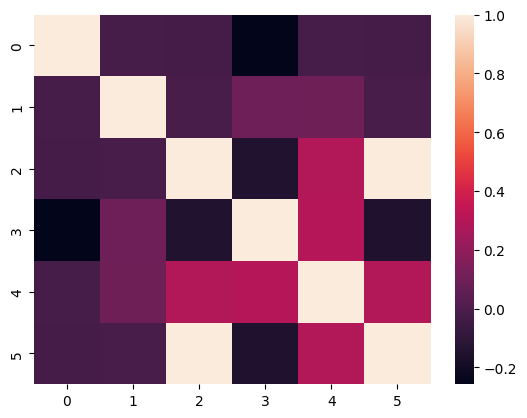

In [2]:
start_date = pd.Timestamp('2024-03-20')
end_date = pd.Timestamp('2024-05-09')


df = mod_def.combine_resampled_data(start_date, end_date)
df = df.iloc[:, 0:6]
# print(df.head())
# print(f"This is the shape:" ,df.shape)

#Standardize the features
#Create an object of StandardScaler which is present in sklearn.preprocessing
scalar = StandardScaler() 
scaled_data = pd.DataFrame(scalar.fit_transform(df)) #scaling the data
scaled_data


#Check the Co-relation between features without PCA
sns.heatmap(scaled_data.corr())

In [5]:
pca = PCA(n_components = 6)
pca.fit(scaled_data)
data_pca = pca.transform(scaled_data)
data_pca = pd.DataFrame(data_pca,columns=['PC1','PC2', 'PC3', 'PC4', 'PC5', 'PC6'])
data_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,0.291325,-1.687496,0.360291,-0.577310,-1.084389,0.002050
1,0.288319,-1.676578,0.361828,-0.573032,-1.075019,0.002017
2,0.288156,-1.687973,0.359760,-0.577127,-1.091116,0.002060
3,0.287115,-1.687026,0.360341,-0.576867,-1.089799,0.002057
4,0.289340,-1.686713,0.358268,-0.574712,-1.093932,0.002062


<Axes: >

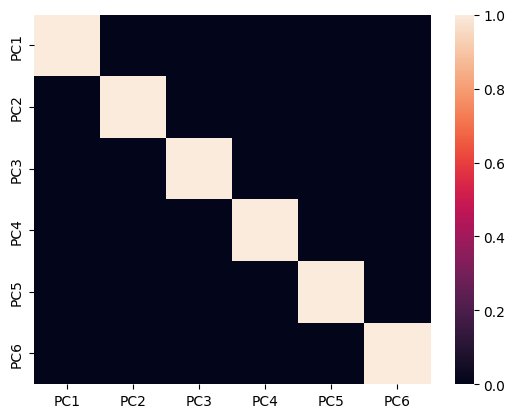

In [6]:
#Checking Co-relation between features after PCA
sns.heatmap(data_pca.corr())